In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

import utils.tavr_torch as tavr_torch
from utils.tavr_torch import TAVR_3_Frame, TAVR_1_Frame, TAVR_Sequence, tavr_dataloader
from utils.visualization import display_grid, z_stretch, visualize_frame, set_figsize, get_central_slices
from utils.loss_functions import batch_l2_loss
from utils.run_model import train, test, save, load, get_loss_history
from Models.basic_models import average_model, two_layer_basic, post_process, two_d_basic

set_figsize(20, 15)

Training directory found, 36 series
Validation directory found, 6 series
Testing directory found, 10 series


In [2]:
USE_GPU = False
dtype = torch.float32 # we will be using float throughout this tutorial
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('using device:', device)

# "Pixl", "Slice", or "None"
preproc_type = "pixel"

validation = TAVR_3_Frame("__valid", preproc=preproc_type)
val_loader = tavr_dataloader(validation, batch_size=4, shuffle=True, num_workers=2)
training = TAVR_3_Frame("__train", preproc=preproc_type)
train_loader = tavr_dataloader(training,batch_size=8, shuffle=True, num_workers=2)


ave_model = average_model()
model = two_d_basic()
post_proc = post_process(kind=preproc_type).to(device=device)
loss_fn = batch_l2_loss()

# CHANGE TO NAME OF JUPYTER NOTEBOOK
model_name = "Model 6 (2d CNN+PixelNorm-Adam) Run 1"

using device: cpu


In [3]:
learning_rate = 3e-3
momentum = 0.90
reg = 1e-7

optimizer = optim.Adam(model.parameters(), weight_decay=reg)

In [4]:
# Run cell to load model
LOAD = True
iteration_num = 81

if LOAD:
    
    load(model_name, iteration_num, model, optimizer)
    loss_history = get_loss_history(model_name)
    model.to(device=device)
else:
    loss_history = None

model loaded from model_checkpoints/Model 6 (2d CNN+PixelNorm-Adam) Run 1/Model 6 (2d CNN+PixelNorm-Adam) Run 1-81


In [5]:
train(model, post_proc, optimizer, train_loader, val_loader, loss_fn, device, 
         model_name, loss_history, epochs=3, print_every=30, print_level=4, lr_decay=1)


Iteration 180, loss = 0.3278, corrected loss = 152.5367
Validation loss 135.7434 over 81 frames
model saved to model_checkpoints/Model 6 (2d CNN+PixelNorm-Adam) Run 1/Model 6 (2d CNN+PixelNorm-Adam) Run 1-180
conv_a1.weight,   	norm: 4.7365e+00, 	update norm: 5.7542e-03 	Update/norm: 1.2149e-03
conv_a1.bias,   	norm: 6.2187e-01, 	update norm: 1.6220e-03 	Update/norm: 2.6082e-03
conv_b1.weight,   	norm: 3.6244e+00, 	update norm: 5.6468e-03 	Update/norm: 1.5580e-03
conv_b1.bias,   	norm: 6.2205e-01, 	update norm: 1.4871e-03 	Update/norm: 2.3906e-03
final.weight,   	norm: 1.5563e+00, 	update norm: 3.1113e-03 	Update/norm: 1.9992e-03
final.bias,   	norm: 2.9740e-01, 	update norm: 5.4300e-04 	Update/norm: 1.8258e-03

... 0.3220... 0.3031... 0.3035
Iter 190... 0.3172... 0.3112... 0.3155
Iter 200... 0.3033... 0.2955... 0.2723
Iteration 210, loss = 0.2693, corrected loss = 125.3322
Validation loss 121.6459 over 81 frames
model saved to model_checkpoints/Model 6 (2d CNN+PixelNorm-Adam) Run 1/M

Process Process-2:
Process Process-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._re

KeyboardInterrupt: 

In [8]:
no_post_proc = post_process(kind="None").to(device=device)

In [24]:
# One last test + visualize results on 1 validation sequence
val_seq = TAVR_Sequence("__valid")
test(ave_model, post_proc, val_loader, loss_fn, device)
print('finished average')
test(model, post_proc, val_loader, loss_fn, device)

Training directory found, 36 series
Validation directory found, 6 series
Testing directory found, 10 series
Validation loss 36.8512 over 81 frames
finished average
Validation loss 120.7216 over 81 frames


tensor(120.7216)

torch.Size([1, 77, 256, 256])
torch.Size([1, 77, 256, 256])
torch.Size([1, 77, 256, 256])
torch.Size([1, 77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])
torch.Size([77, 256, 256])


/home/shared/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


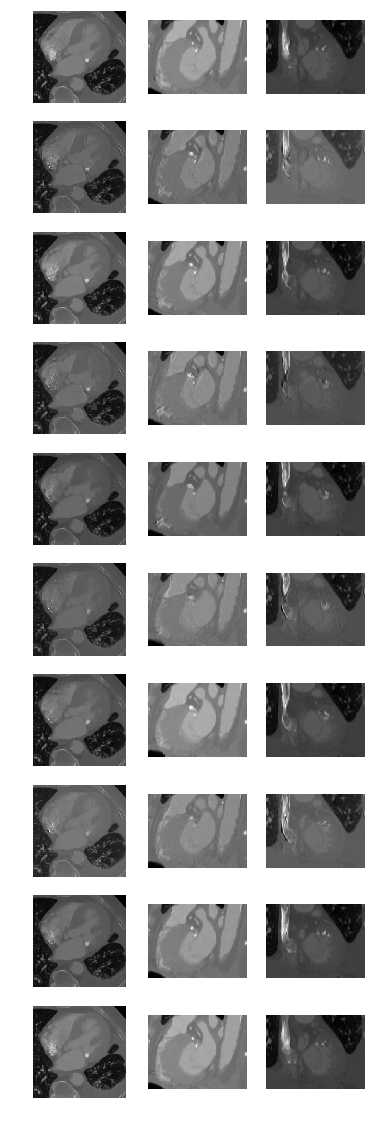

In [30]:
with torch.no_grad():
    model.eval()
    ave_frames = [post_proc(val_seq[0][0])]
    for i in range(2,9,2):
        ave_frame = model((val_seq[0][i-2][None,:], val_seq[0][i][None,:]))
        print(ave_frame.shape)
        ave_frames += [post_proc(ave_frame[0]),  post_proc(val_seq[0][i])]
    ave_frames += [post_proc(val_seq[0][9])]
    ave_frames_slices = []
    for f in ave_frames:
        print(f.shape)
        ave_frames_slices += get_central_slices(f)
    set_figsize(6,20)
    display_grid(10, 3, ave_frames_slices)

In [22]:
print((ave_frames[0][0] - ave_frames[1][0])**2)

tensor([[ 2.6813e+09,  6.7097e+10,  1.0100e+11,  ...,  3.4032e+08,
          3.6745e+08,  6.6007e+07],
        [ 2.1977e+10,  1.3723e+11,  1.0480e+11,  ...,  2.4469e+08,
          4.4533e+05,  1.0386e+06],
        [ 4.4994e+09,  8.2882e+10,  7.1447e+10,  ...,  2.7903e+01,
          4.9300e+05,  1.4973e+08],
        ...,
        [ 4.0652e+08,  5.8296e+09,  4.7927e+09,  ...,  1.6315e+11,
          1.2084e+11,  1.9496e+11],
        [ 5.0798e+08,  8.5010e+09,  5.7744e+09,  ...,  1.2698e+11,
          1.1560e+11,  1.8958e+11],
        [ 7.6339e+08,  3.0527e+09,  3.2657e+09,  ...,  7.1858e+10,
          8.1369e+10,  8.0464e+10]])


In [31]:
optimizer.param_groups[0]['lr']

0.001

In [32]:
for p in model.parameters():
    print(p.norm())

tensor(4.7336)
tensor(0.6398)
tensor(3.6241)
tensor(0.6295)
tensor(1.5422)
tensor(0.2884)
